<img src="https://i.imgur.com/FFdwRbg.png" align=center> 

# CMEMS_2 SAIL CYCLONES
## Studying the impact of the FELLENG cyclone on oceanic temperature in the Indian Ocean


--------------
### Felleng cyclone, 31 Jan 2013 10h00 UTC
<img src="https://i.imgur.com/I5MgF3A.jpg" width=500>


-----------



We propose in this exercise to study the signature of the Felleng cyclone (Indian Ocean)
over the modeled sea temperature obtained with several oceanic configurations.

The cyclone track is retrieved from the “International Best Track Archive for Climate
Sewardship” (IBTrACS, NOAA).

The available temperature fields are from the Mercator G12-ANA operational model (1/12° with data assimilation), the Mercator G4-MY-REANA reanalysis (1/4° with data assimilation), and a specific regional configuration nested in
GLORYS called Z12-REUNION-FREE, specifically designed for this exercise. This latter
encompasses more advance physics regarding ocean-atmosphere exchanges, but is
deprived of data assimilation.




# Table of contents
- [1. Description of the available models](#1.-Description-of-the-available-models)
- [2. Exercise 1](#2.-Exercise-1)
- [3. Exercise 2](#2.-Exercise-2)
- [4. Exercise 3](#2.-Exercise-3)
- [Appendix 1](#Appendix-1:-some-references)
***


**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br><br>
**General Note 3**: Download the file with all dependencies and unzip while preserving file structure in the same directory as the notebook: [Download dependency file IMG](https://atlas.mercator-ocean.fr/s/5C5P5kABe5qGbfN) [Download dependency file CYCLONES](https://atlas.mercator-ocean.fr/s/b2akERbbBaZsD4o)<br>
***

#  1. Description of the available models

<img src="https://i.imgur.com/YcRUell.png" width=800>


All configurations have a vertical grid of 50 levels and use CORE bulk formulation for
atmospheric fluxes assessment.

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting 2D data on maps. |

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# 2. Exercise 1

In this first exercise, we are going to plot the Sea Surface Temperature of each model between 2013/01/27 and 2013/02/04 with the path of the cylcone and the winds associated.

<img src="https://i.imgur.com/J9bZ1Es.png" width=700>

### Path of the cyclone FELLENG between 2013/01/27 and 2013/02/04 :

<img src="https://i.imgur.com/nLyiq1a.png" width=400>

In [2]:
# choose the model
MODEL = 'G12-ANA'     # 'Z12-REUNION-FREE''G4-MY-REANA'

In [3]:
# load the tracks file
path_file_track = 'CYCLONES/DATA/TRACKS/Year.2013.ibtracs_wmo.v03r08.nc'
file_track = xr.open_dataset(path_file_track)

# There are 98 tracks in this file, the one corresponding to Felleng is the 13th. 

wind_wmo = file_track['wind_wmo'][13].data
lat_wmo = file_track['lat_wmo'][13].data
lon_wmo = file_track['lon_wmo'][13].data
time_wmo = file_track['time_wmo'][13].data

In the next cell we plot the figure for one date. Comment line 9 and uncomment line 11 to plot the whole time series !
 

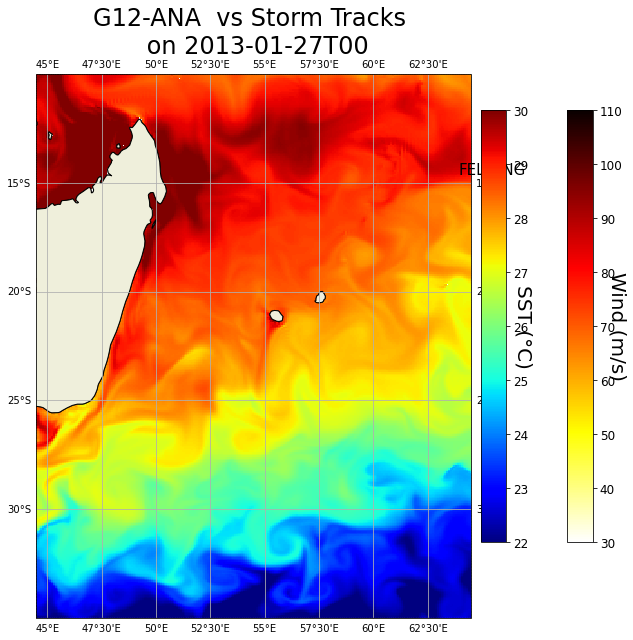

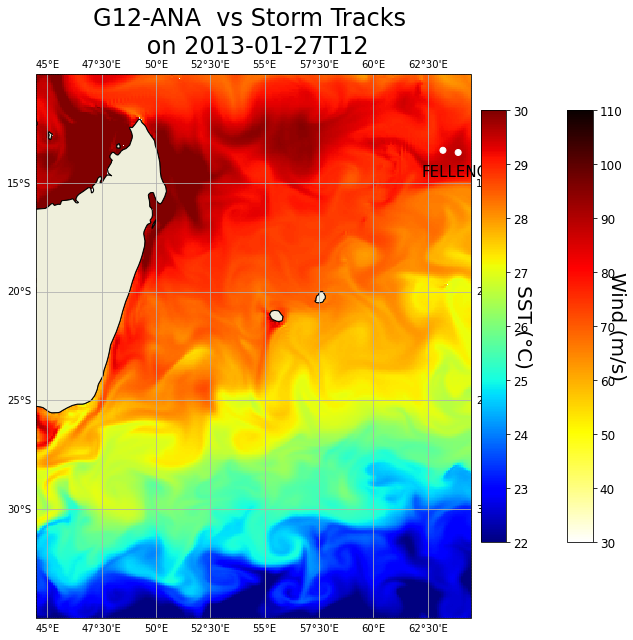

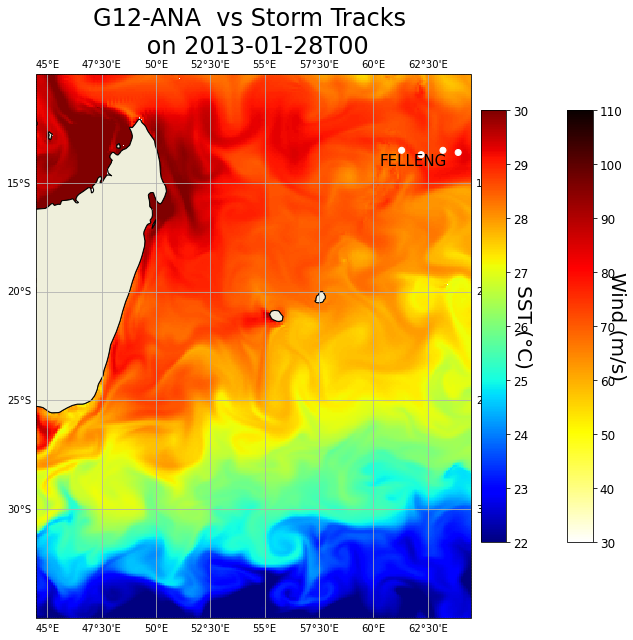

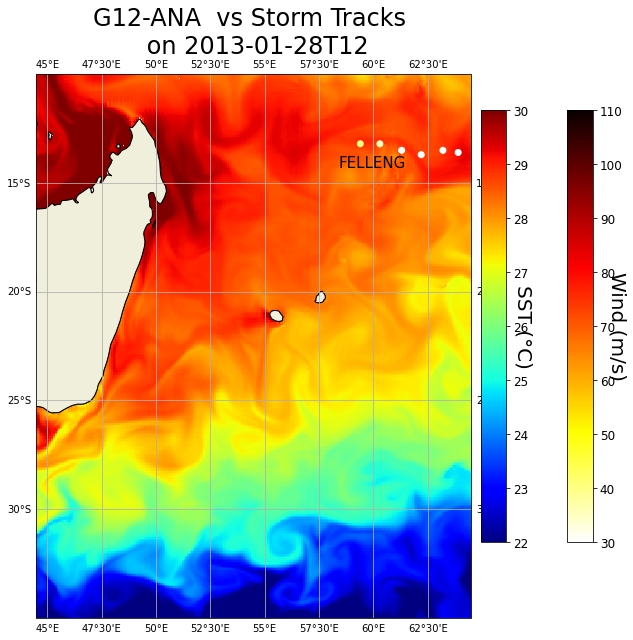

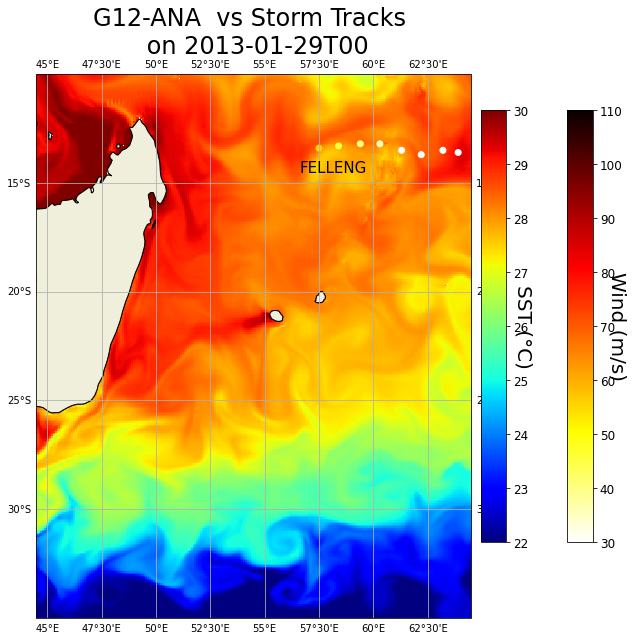

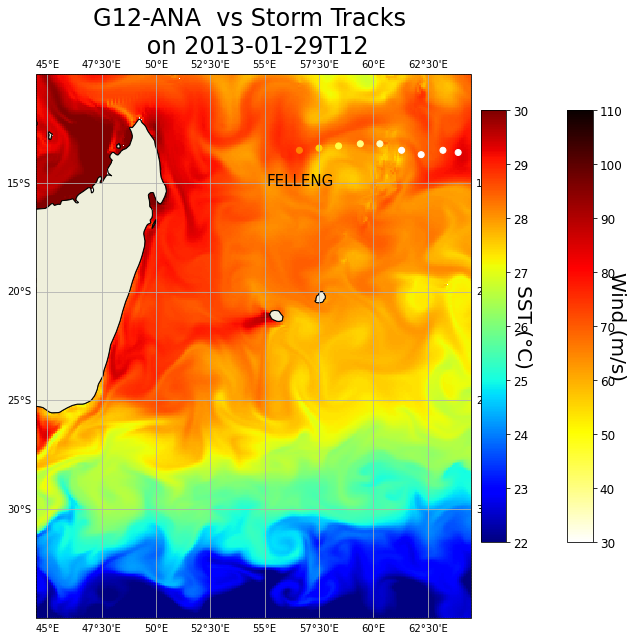

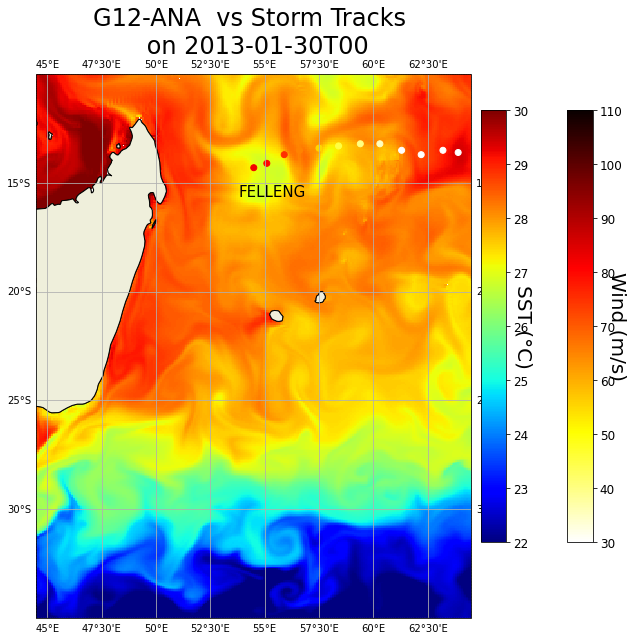

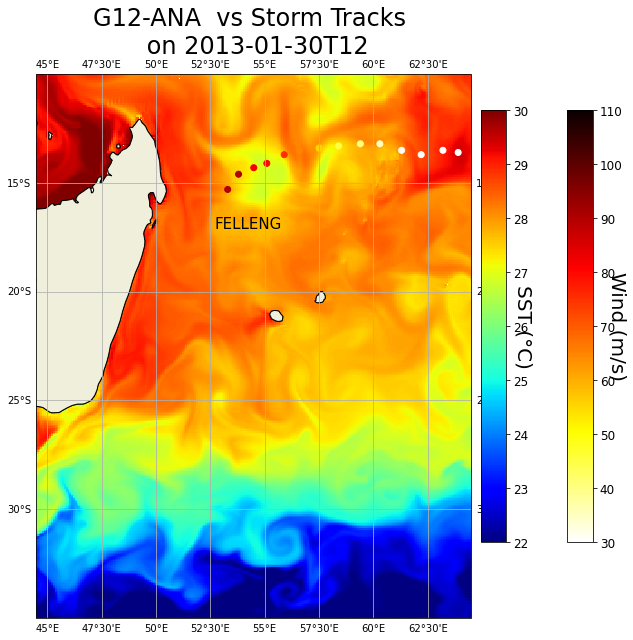

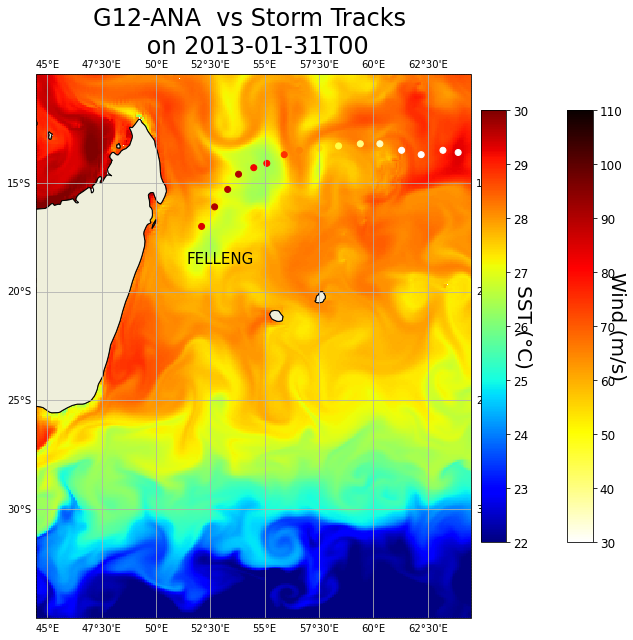

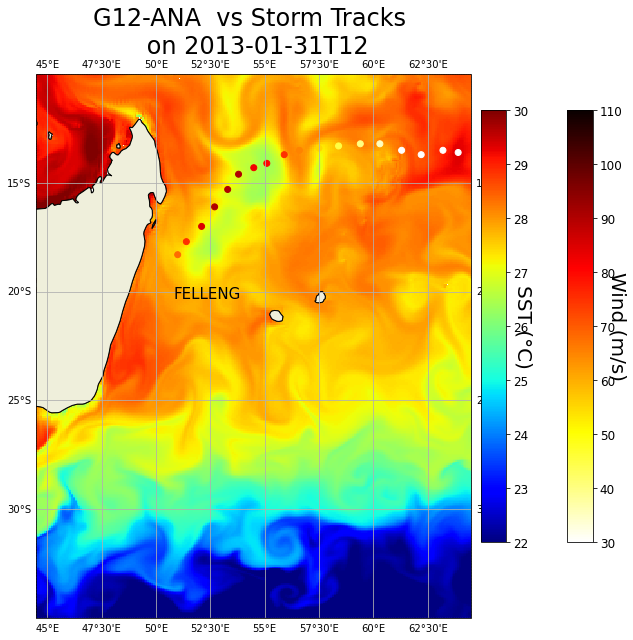

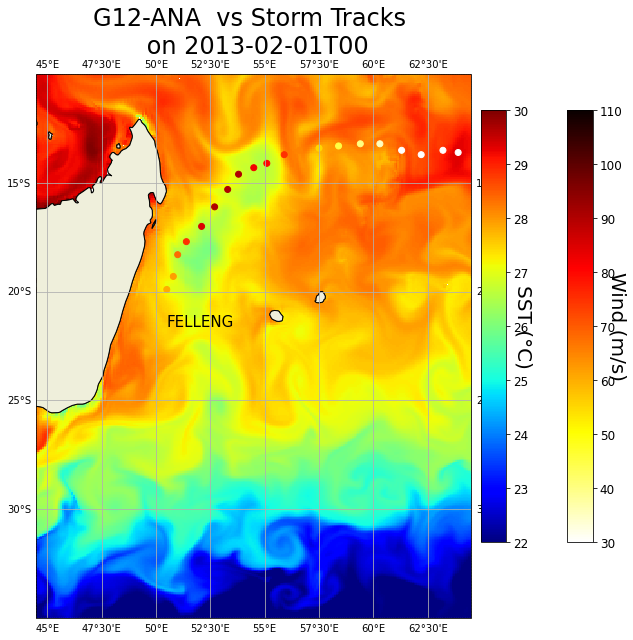

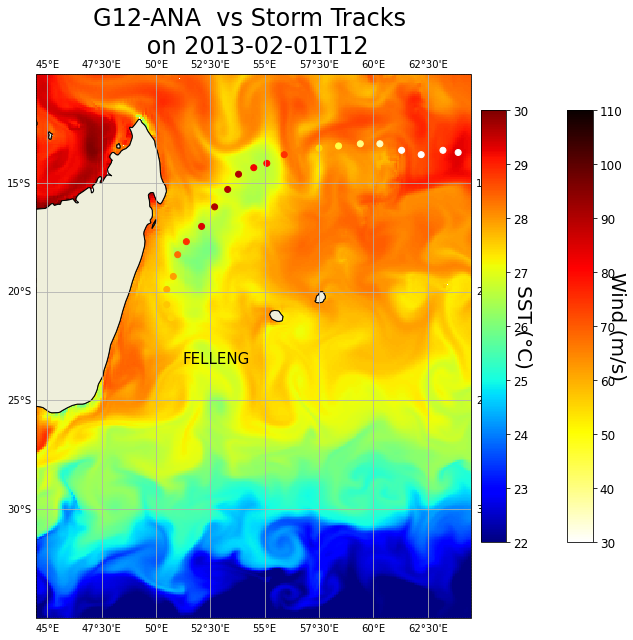

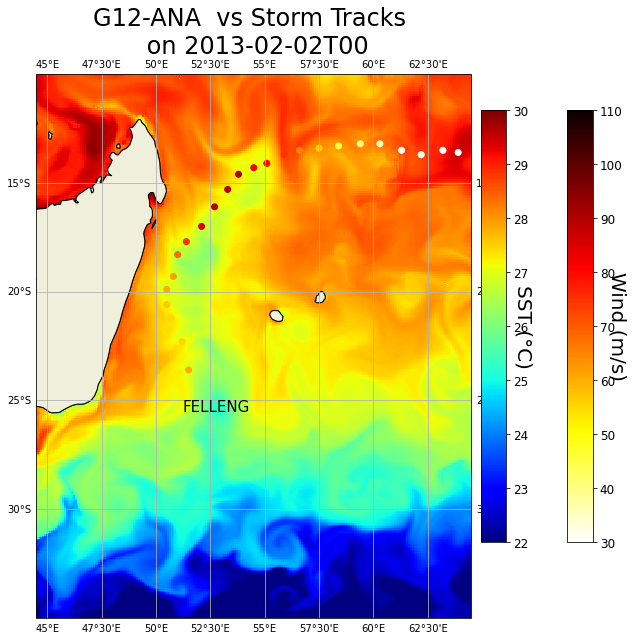

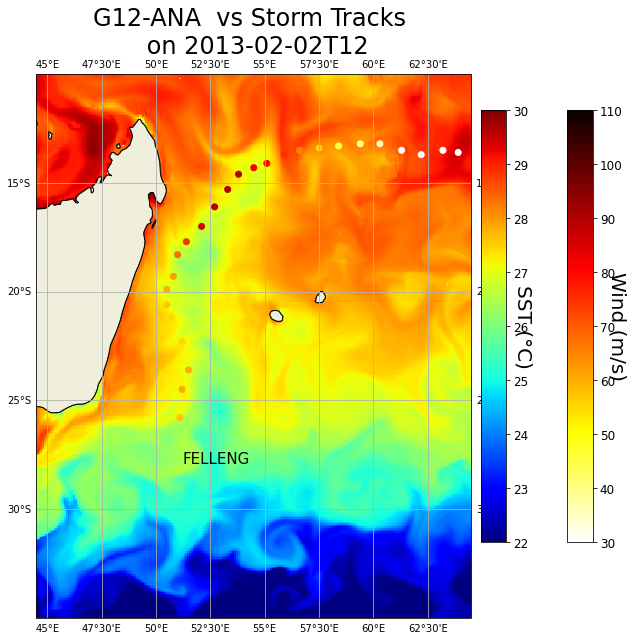

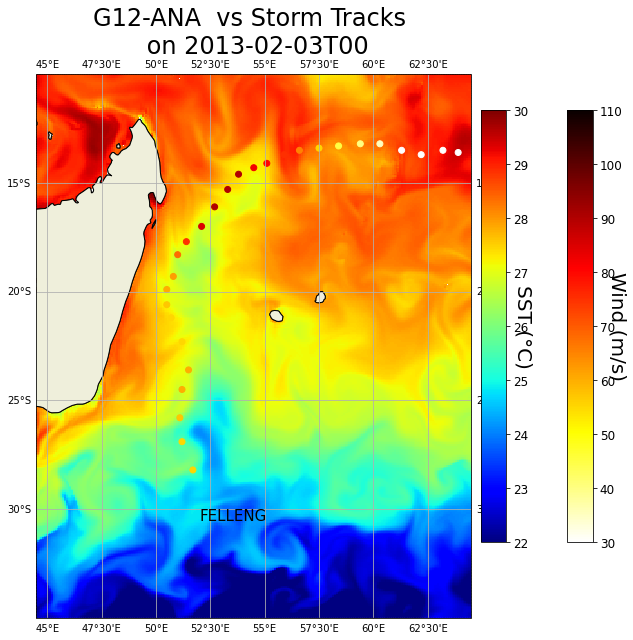

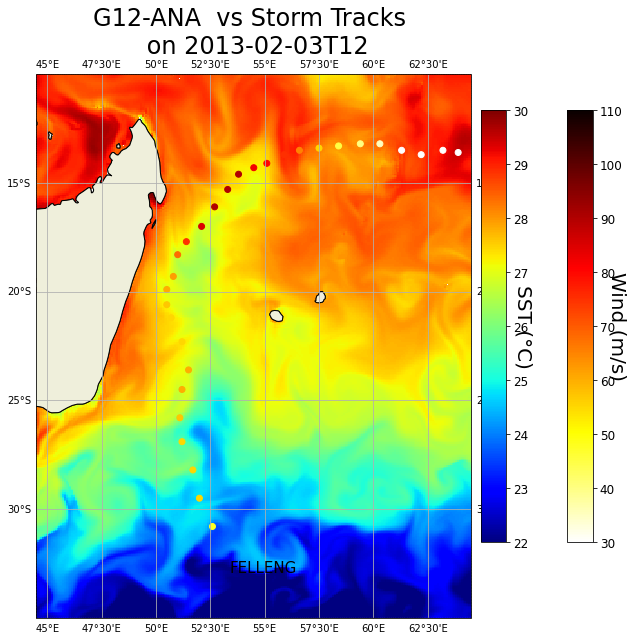

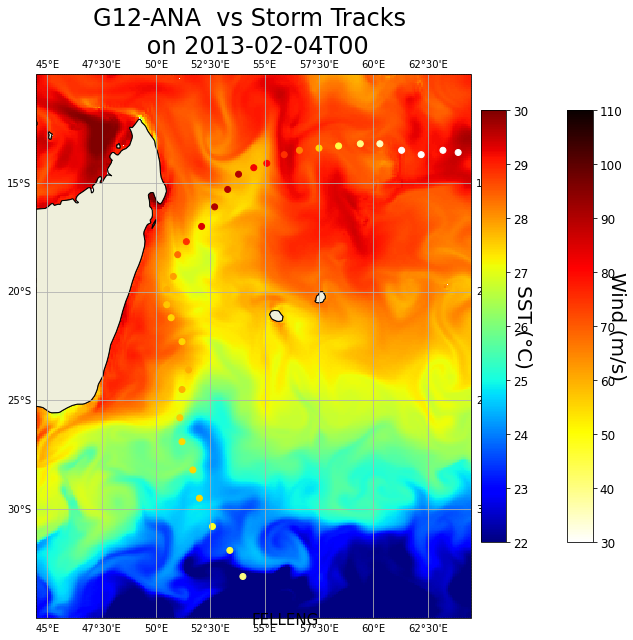

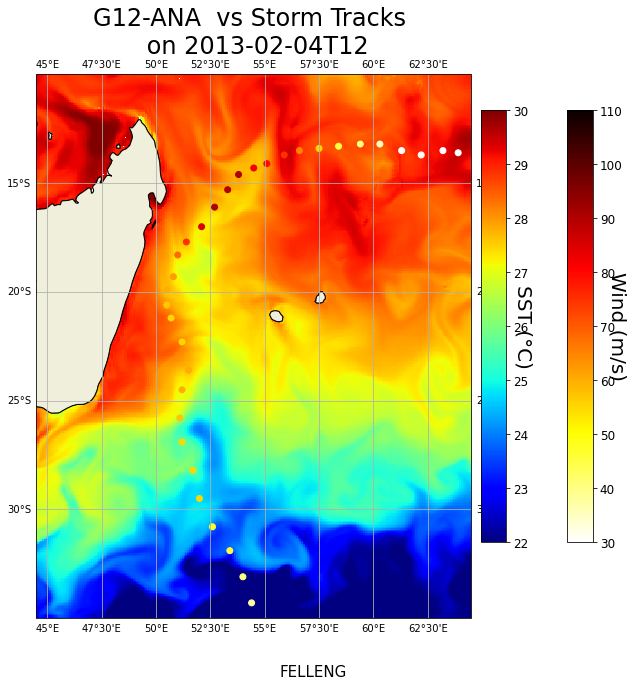

In [4]:
# define the first and last dates to plot
beg_date = np.datetime64('2013-01-27')
end_date = np.datetime64('2013-02-05')
date = np.datetime64('2013-02-01')
# get the indexes corresponding to the dates
idx_t_beg = np.nanargmin(np.abs((time_wmo-beg_date).astype('float')))
idx_t_end = np.nanargmin(np.abs((time_wmo-end_date).astype('float')))
idx_t = np.nanargmin(np.abs((time_wmo-date).astype('float')))

#for i in [idx_t]: # random timestep

# uncomment the following line to get the temporal loop on dates 
for i in range(idx_t_beg,idx_t_end,2): # 2013-01-27 to 2013-02-04 , every other date for 12 hour time step
    
    date = time_wmo[i]
    
    # open the file of the corresponding date
    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    if MODEL == 'Z12-REUNION-FREE':
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    else:
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1dAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
    
    
    # define the caracteristics of the map 
    f = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([44.5,64.5,-35,-10])
    ax.set_title(MODEL + '  vs Storm Tracks \n on ' + np.datetime_as_string(date,unit='h') ,fontsize=24)
    
    
    ## plot temperature for Z12 
    if MODEL == 'Z12-REUNION-FREE':
        if np.datetime_as_string(date,unit='h')[11] == '0': # if 00H
            im = ax.pcolor(file['nav_lon'],file['nav_lat'],file['votemper'][0,0],vmin=22,vmax=30,cmap='jet',shading='auto') #T=00H
        else : # if 12H
            im = ax.pcolor(file['nav_lon'],file['nav_lat'],file['votemper'][12,0],vmin=22,vmax=30,cmap='jet',shading='auto') #T=12H

    ## plot temperature for others 
    elif MODEL == 'G4-MY-REANA' :
        im = ax.pcolor(file['nav_lon'],file['nav_lat'],file['votemper'][0],vmin=22,vmax=30,cmap='jet',shading='auto')

    elif MODEL == 'G12-ANA' :
        im = ax.pcolor(file['nav_lon'],file['nav_lat'],file['votemper'][0,0],vmin=22,vmax=30,cmap='jet',shading='auto')        
    
    # plot the positions, the wind and the label of the cyclone
    track = plt.scatter(lon_wmo[5:i],lat_wmo[5:i],c=wind_wmo[5:i],vmin=30,vmax=110,cmap='hot_r')
    plt.text(lon_wmo[i],lat_wmo[i]-1,'FELLENG',fontsize=15)
    
    
    # legend
    f.subplots_adjust(right=0.75,hspace= 0.3,wspace=0.5)
    cbar_ax1 = f.add_axes([0.8, 0.23, 0.03, 0.6])
    cbar_ax2 = f.add_axes([0.7, 0.23, 0.03, 0.6])
    cbar1 = f.colorbar(im,cax=cbar_ax2)
    cbar1.set_label('SST (°C)', rotation=270,fontsize = 20)
    cbar1.ax.tick_params(labelsize=12)
    cbar2 = f.colorbar(track,cax=cbar_ax1)
    cbar2.set_label('Wind (m/s)', rotation=270,fontsize=20)
    cbar2.ax.tick_params(labelsize=12)
    
    plt.savefig('CYCLONES/FIGURES/EX1/SST_'+MODEL+'_'+np.datetime_as_string(date,unit='h')+'.png')
    plt.close()


<div class="alert alert-block alert-success">
    <b>Question 1 :</b> Make some plots that show the track of the cyclone each 12 hours, colored with the intensity of associated observed wind, superimposed over the sea surface temperature (SST) forecasted by G12-ANA, G4-MY-REANA and Z12-REUNION-FREE.
</div>

<div class="alert alert-block alert-success">

<b>Question 2 :</b> From the total track, spot the life cycle of the cyclone (intensification or decay stage). Compare it to the initial SST of Jan 27th and the SST of Feb 1st. From your knowledge or physical sense, what happened? (have a look at appendixes for ideas)</div>

<img src="https://i.imgur.com/yyw89YZ.png"  align=left width=500>
<img src="https://i.imgur.com/XbE6ja0.png" align=left width=500>

<div class="alert alert-block alert-success">
<b>Question 3 :</b>  Which simulation exhibits the strongest SST impact due to Felleng passage? If you were a modeler, how would you operate to see which simulation is the best?
</div>

# 3. Exercise 2

<div class="alert alert-block alert-success">
<b>Question 1 :</b> We give some typical diagnostics usually studied when looking at ocean-cyclone interactions. Explain why those quantities are interesting, and how they arerelated to the life cycle of cyclones. Can we put into relation the OHC and the depth of the 26°C isotherm? :**  Which simulation exhibits the strongest SST impact due to Felleng passage? If you were a modeler, how would you operate to see which simulation is the best?</div>

### Description of typical diagnostics used to study ocean-atmosphere interactions when a cyclone passes by

-  Depth of the 26°C isotherm ($Z_{T=26°C}$ ): It is the minimal depth (m) where the temperature of the ocean is inferior to 26°C.
- Mixing depth based on temperature criterion: minimum depth (m) where the ocean local temperature is 0.5°C lower than the surface temperature above.
- Ocean Heat Content (OHC) = $ \int_{Z_{T=26°C}}^{Z_0} ρ C_p (T(z) − 26) dz $

With $Z_0$ the sea surface; $Z_{T=26°C}$ the depth of the 26°C isotherm; $ρ = 1025 kg.m^{-3}$ the sea water density; $C_p = 3993 J.kg^{-1}.K^{-1}$ the specific heat capacity (taken at 20°c). Practical values of OHC are expressed in $KJ.cm^{-2}$


It is believed that cyclones can only be formed over sea surface temperature of at least 26°C, as it pulls energy from associated latent fluxes.

In the following cells you get to chose the model and the diagnostic to plot. Here again, you have to comment/uncomment the corresponding lines to get the loop on the dates.

In [7]:
# choose the model
MODEL =   'Z12-REUNION-FREE' # 'G4-MY-REANA' 'G12-ANA'
DIAG = 'mixdepth' #  'ohc''26deg'

# constants 
ro=1025 # Kg.m-3
CP=3.993 # KJ.Kg-1.K-1


/opt/anaconda3/envs/unesco/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1887: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


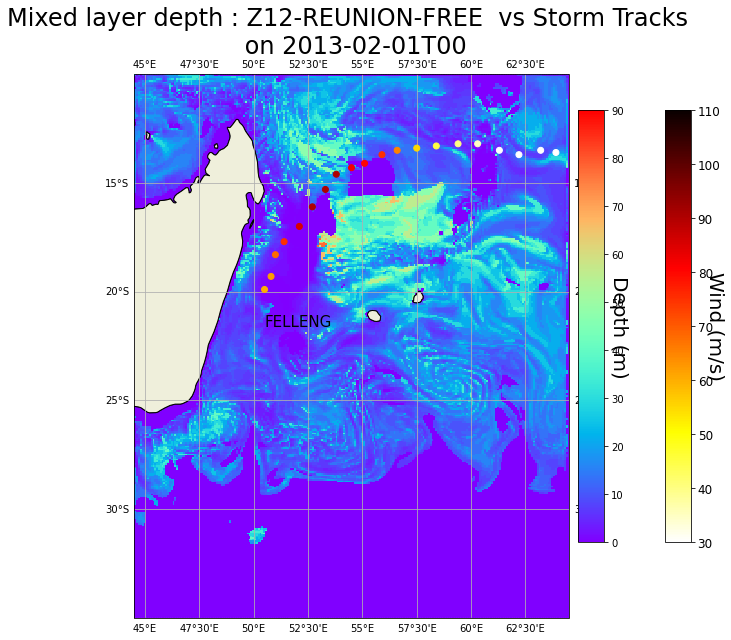

In [15]:
# define the first and last dates to plot
beg_date = np.datetime64('2013-01-27')
end_date = np.datetime64('2013-02-05')
date = np.datetime64('2013-02-01')
# get the indexes corresponding to the dates
idx_t_beg = np.nanargmin(np.abs((time_wmo-beg_date).astype('float')))
idx_t_end = np.nanargmin(np.abs((time_wmo-end_date).astype('float')))
idx_t = np.nanargmin(np.abs((time_wmo-date).astype('float')))

for i in [idx_t]: # random timestep

# uncomment the following line to get the temporal loop on dates 
# for i in range(idx_t_beg,idx_t_end,2): # 2013-01-27 to 2013-02-04 , every other date for 12 hour time step
    
    date = time_wmo[i]
    
    # open the file of the corresponding date
    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    if MODEL == 'Z12-REUNION-FREE':
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    else:
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1dAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
      
    #define the plot caracteristics                
    f = plt.figure(figsize=(12, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    ax.set_extent([44.5,64.5,-35,-10])
    f.subplots_adjust(right=0.75,hspace= 0.3,wspace=0.5)
    
    # plot the tracks 
    track = plt.scatter(lon_wmo[5:i],lat_wmo[5:i],c=wind_wmo[5:i],vmin=30,vmax=110,cmap='hot_r',zorder=100)
    plt.text(lon_wmo[i],lat_wmo[i]-1,'FELLENG',fontsize=15)
    
    cbar_ax1 = f.add_axes([0.8, 0.23, 0.03, 0.6])
    cbar_ax2 = f.add_axes([0.7, 0.23, 0.03, 0.6])
    
    cbar1.ax.tick_params(labelsize=12)
    
    cbar2 = f.colorbar(track,cax=cbar_ax1)
    cbar2.set_label('Wind (m/s)', rotation=270,fontsize=20)
    cbar2.ax.tick_params(labelsize=12)
    
    
    ############# Mixing depth
    if DIAG == 'mixdepth':
        # calculate
        mix_depth = np.zeros((331,241))
        for x in range(241):
            for y in range(331):

                if np.max(file['votemper'].data[0,:,y,x])>26:
                    idx = np.nanargmin(np.abs(file['votemper'].data[0,:,y,x] - file['votemper'].data[0,0,y,x]-0.5))
                    mix_depth[y,x]=file['deptht'][idx]
                else :
                    mix_depth[y,x]=0
        # plot the depth
        im = ax.pcolor(file['nav_lon'],file['nav_lat'],mix_depth,vmin=0,vmax=90,cmap='rainbow',shading='nearest')
        
        # legend
        ax.set_title('Mixed layer depth : '+ MODEL + '  vs Storm Tracks \n on ' + np.datetime_as_string(date,unit='h') ,fontsize=24)
        cbar1 = f.colorbar(im,cax=cbar_ax2)
        cbar1.set_label('Depth (m)', rotation=270,fontsize = 20)
        
        # save
        plt.savefig('CYCLONES/FIGURES/EX2/MixedLayerDepth_'+MODEL+'_'+np.datetime_as_string(date,unit='h')+'.png')
     
    
    
    ############# OCH
    elif DIAG == 'och':
        # calculate OCH
        och = np.zeros((331,241))
        for x in range(241):
            for y in range(331):
                if np.nanmax(file['votemper'].data[0,:,y,x])>26:
                    idx = np.nanargmin(np.abs(file['votemper'].data[0,:,y,x] - 26))
                    for d in range(idx):
                        och[y,x]=och[y,x]+ro*CP*(file['votemper'].data[0,d,y,x] - 26)
                else :
                    och[y,x]=0
        # plot the depth
        im = ax.pcolor(file['nav_lon'],file['nav_lat'],och/10000,vmin=0,vmax=30,cmap='RdBu_r',shading='auto')   
        
        # legend
        ax.set_title('Ocean Heat Content : '+ MODEL + '  vs Storm Tracks \n on ' + np.datetime_as_string(date,unit='h') ,fontsize=24)
        cbar1 = f.colorbar(im,cax=cbar_ax2)
        cbar1.set_label('KJ/cm2', rotation=270,fontsize = 20)
        
        #save
        plt.savefig('CYCLONES/FIGURES/EX2/OceanHeatContent_'+MODEL+'_'+np.datetime_as_string(date,unit='h')+'.png')
        



    ############# Isotherm 26 deg
    elif DIAG == '26deg':
        isotherm = np.empty((331,241))
        for x in range(241):
            for y in range(331):
                if np.max(file['votemper'].data[0,:,y,x])>26:
                    idx = np.nanargmin(np.abs(file['votemper'].data[0,:,y,x] - 26))
                    isotherm[y,x]=file['deptht'][idx]
                else :
                    isotherm[y,x]=0    
        # plot data
        im = ax.pcolor(file['nav_lon'],file['nav_lat'],isotherm,vmin=0,vmax=90,cmap='rainbow',shading='auto')
        
        # legend
        ax.set_title('26°C isotherm depth : '+ MODEL + '  vs Storm Tracks \n on ' + np.datetime_as_string(date,unit='h') ,fontsize=24)
        cbar1 = f.colorbar(im,cax=cbar_ax2)
        cbar1.set_label('Depth (m)', rotation=270,fontsize = 20)
        
        # save
        plt.savefig('CYCLONES/FIGURES/EX2/26degDepth_'+MODEL+'_'+np.datetime_as_string(date,unit='h')+'.png')
        
        

<img src="https://i.imgur.com/dWELwXK.png" align=left width=400>
<img src="https://i.imgur.com/5Y7cW3X.png" align=left width=400>
<img src="https://i.imgur.com/xrYnsSt.png" align=left width=400>

<div class="alert alert-block alert-success">
<b>Question 2 :</b> Compute and trace those quantities day by day (superpose the cyclone track again). What is the magnitude of the mixing (in depth) produced by the cyclone? What can you say from the horizontal structure of the 26°C isotherm depth? Is the mixing symmetrical from either side of the track?</div>

<div class="alert alert-block alert-success">
<b>Question 3 :</b> One gives the value of $16.5 kJ. cm^{-2}$ for the OHC as a limit value above which the cyclone can reinforce itself by extracting energy from ocean (latent fluxes). Comment the evolution of the horizontal structure of OHC when the cyclone passes by.</div>

# 4. Exercise 3

<div class="alert alert-block alert-success">
<b>Question 1 :</b>  We are interested to see if the high frequency (1h) outputs of our Z12-REUNION-FREE simulation allow us to see finer exchanges between the cyclone and the sea surface. Plot the time series of SST from Z12 collocated along the track of the cyclone. Compare the hourly signal vs the daily signal and comment.</div>

In [ ]:
MODEL =   'Z12-REUNION-FREE'
# define the first and last dates to plot
beg_date = np.datetime64('2013-01-27')
end_date = np.datetime64('2013-02-05')
date = np.datetime64('2013-02-01')
# get the indexes corresponding to the dates
idx_t_beg = np.nanargmin(np.abs((time_wmo-beg_date).astype('float')))
idx_t_end = np.nanargmin(np.abs((time_wmo-end_date).astype('float')))
idx_t = np.nanargmin(np.abs((time_wmo-date).astype('float')))

# initialize the arrays
time_hourly = []
time_daily = []
sst_hourly = []
sst_daily = []

# hourly data
for i in range(idx_t_beg,idx_t_end):
    date = time_wmo[i]
    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    
    path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
    
    if np.datetime_as_string(date,unit='h')[1] == '0':
        idx_time = 0
    elif np.datetime_as_string(date,unit='h')[1] == '6':
        idx_time = 6 
    elif np.datetime_as_string(date,unit='h')[1] == '2':
        idx_time = 12 
    elif np.datetime_as_string(date,unit='h')[1] == '8':
        idx_time = 18     
        
    idx_y = np.nanargmin(np.abs(file['nav_lat'][:,0] - lat_wmo[i]))    
    idx_x = np.nanargmin(np.abs(file['nav_lon'][0,:] - lon_wmo[i])) 
            
    sst_6h = file['votemper'][idx_time,0,idx_y,idx_x]
    sst_hourly.append(sst_6h)
    
    time_6h = file['time_counter'].data[idx_time]
    time_hourly.append(date)

# daily data
for i in range(idx_t_beg,idx_t_end,4): 
    
    date = time_wmo[i]
    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    
    path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
    
        
    idx_y = np.nanargmin(np.abs(file['nav_lat'][:,0] - lat_wmo[i]))    
    idx_x = np.nanargmin(np.abs(file['nav_lon'][0,:] - lon_wmo[i])) 
    
        
    sst_day = file['votemper'][:,0,idx_y,idx_x].mean('time_counter',skipna=True)
    sst_daily.append(sst_day)
    
    time_day = file['time_counter'].data[0]
    time_daily.append(date)  
 
    
# plot
f = plt.figure(figsize=(10, 8))
ax = plt.axes()
plt.grid()

p1, = ax.plot(time_daily,sst_daily,c='tab:orange',linewidth=3,linestyle='--', label = 'Daily')

p2, = ax.plot(time_hourly,sst_hourly,c='tab:blue',linewidth=3, label = 'Hourly')

ax.set_title('SST time series '+MODEL+ '\n along Felleng cyclone track',fontsize=24)
ax.set_ylabel("°C",fontsize=18)
ax.legend(handles = [p1,p2],fontsize=20)


plt.savefig('CYCLONES/FIGURES/EX3/Hourly_vs_Daily_model.png')

In [11]:
ls nesco/DATA/Z12-REUNION-FREE/

ls: cannot access /DATA/shared_unesco/DATA/Z12-REUNION-FREE/: No such file or directory


<div class="alert alert-block alert-success">
<b>Question 2 :</b>  We now want to make the same diagnostic, but at a fixed point. Perform a synthetic mooring by plotting the SST time series at the point where Felleng passes on Feb 1st at noon. Comment.</div>

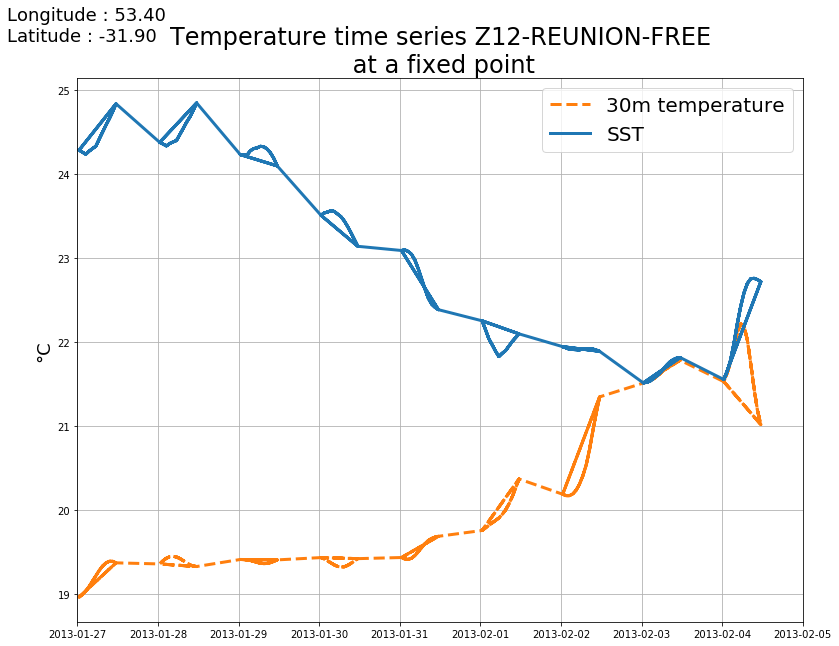

In [31]:
# define the first and last dates to plot
beg_date = np.datetime64('2013-01-27')
end_date = np.datetime64('2013-02-05')
date = np.datetime64('2013-02-01')
# get the indexes corresponding to the dates
idx_t_beg = np.nanargmin(np.abs((time_wmo-beg_date).astype('float')))
idx_t_end = np.nanargmin(np.abs((time_wmo-end_date).astype('float')))
idx_t = np.nanargmin(np.abs((time_wmo-date).astype('float')))

# initialize arrays
times = []
t0 = []
t30 = []
depth = 30
idx_t = 35
lon =  file_track['lon_wmo'][13,idx_t] 
lat =file_track['lat_wmo'][13,idx_t]

# calculate t0 and t30
for i in range(idx_t_beg,idx_t_end):
    date = time_wmo[i]
    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    
    path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
    
    idx_y = np.nanargmin(np.abs(file['nav_lat'][:,0] - lat))    
    idx_x = np.nanargmin(np.abs(file['nav_lon'][0,:] - lon)) 
    idx_d = np.nanargmin(np.abs(file['deptht'][:] - depth)) 
        
    for t in range(12):
        times.append(file['time_counter'].data[t])
        t0.append(file['votemper'][t,0,idx_y,idx_x])
        t30.append(file['votemper'][t,idx_d,idx_y,idx_x])
        

f = plt.figure(figsize=(13, 10))
ax = plt.axes()
plt.grid()


p1, = ax.plot(times,t30, c='tab:orange',linewidth=3,linestyle='--', label = '30m temperature')
#p1 = ax.scatter(times,t30, label = '30m temperature')
p2, = ax.plot(times,t0,c='tab:blue',linewidth=3, label = 'SST')
#p2 = ax.scatter(times,t0, label = '30m temperature')

f.suptitle('Longitude : ' +str(format(lon.data,'.2f')) +'\nLatitude : ' + str(format(lat.data,'.2f')) ,fontsize=18,horizontalalignment='left',x=0.05)
ax.set_title('Temperature time series '+MODEL+ '\n at a fixed point',fontsize=24)
ax.set_ylabel("°C",fontsize=18)
ax.legend(handles = [p1,p2],fontsize=20)
ax.set_xlim([beg_date, end_date])

plt.savefig('CYCLONES/FIGURES/EX3/T30m_vs_sst.png')

In [24]:
print(file['time_counter'].data[t])
print(file['votemper'][t,0,idx_y,idx_x].data)
print(file['votemper'][t,idx_d,idx_y,idx_x].data)

2013-02-04T11:30:00.000000000
28.2474308013916
27.094501495361328


<div class="alert alert-block alert-success">
<b>Question 3 :</b>  Perform a vertical section of temperature (from 0 to 200m), collocated along the track of the cyclone (every 3h). Do this for Z12-REUNION-FREE and G12-ANA.
</div>

In [ ]:
# choose the model
MODEL =  'G12-ANA' #  'Z12-REUNION-FREE''G4-MY-REANA'

In [ ]:
date = np.datetime64('2013-01-27T00')
times = []
#sst = np.empty((26,200)) #Z12
sst = np.empty((50,200)) #G12

for k in range(200):

    date_str = np.datetime_as_string(date,unit='D').replace('-','')
    

    idx_t_track = np.nanargmin(np.abs((time_wmo[:]-(date)).astype('float')))

    lat = lat_wmo[idx_t_track]
    lon = lon_wmo[idx_t_track]
    
       
    if MODEL == 'Z12-REUNION-FREE':
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1hAV_'+date_str+'.nc'
    else:
        path_file = 'CYCLONES/DATA/'+MODEL +'/'+MODEL+'_1dAV_'+date_str+'.nc'
    file = xr.open_dataset(path_file)
    
    
    
    
    file = xr.open_dataset(path_file)
    
    idx_t_file = np.nanargmin(np.abs((file['time_counter'].data[:]-(date)).astype('float')))
    
    idx_y = np.nanargmin(np.abs(file['nav_lat'][:,0] - lat)) 
    idx_x = np.nanargmin(np.abs(file['nav_lon'][0,:] - lon)) 

    sst[:,k] = file['votemper'][idx_t_file,:,idx_y,idx_x].data
    times.append(date)
    date = date + 1

depth = file['deptht'].data
 
f = plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.ylim(0, 200)
plt.grid()

plt.gca().invert_yaxis()
im = ax.contourf(times,depth,sst,30,vmin=10,vmax=30,cmap='jet')
ax.set_title('Temperature vertical profile : '+MODEL+ '\n along Felleng cyclone track',fontsize=24)
ax.set_ylabel("Depth (m)",fontsize=18)
f.colorbar(im)
plt.savefig('CYCLONES/FIGURES/EX3/vertical_profile_'+MODEL+'_alongtrack.png')


<div class="alert alert-block alert-info">
This exercise shows how downscaling is not only about improving the resolution, but can also allow to add the missing physical parameterizations in order to correctly capture oceanic phenomena. This exercise also shows that ocean atmosphere coupling at global scale, or using a downscaling approach, is a major research topic for cyclone forecasting activities.</div>

--------------------
# Appendix 1: some references

Text and figures extracted from the <font color=blue >Phd thesis of Swen JULLIEN : “Ocean response and
feedback to tropical cyclones in the South Pacific: processes and climatology” Ocean,
Atmosphere. Université Paul Sabatier - Toulouse III, 2013. English. (Chapter 1 p12-13) </font>

“The most reported effect of TCs on the ocean is the surface water cooling observed
from satellites where it appears as TC cold wake (Fig. 1.9). The surface cold wake
expresses various storm-induced processes: heat loss to the atmosphere, mixing with
subsurface water, upwelling of deep water by Ekman pumping (Fig. 1.11). SST cooling
is usually asymmetric because of asymmetric wind forcing. We define the TC strong side
as the side of strongest cooling. On the strong side, tangential winds and translation
speed are added (right-hand side in the Northern Hemisphere and left hand side in the
Southern Hemisphere). It is the opposite on the weak side. Asymmetry in winds induces
asymmetry in turbulent mixing. In addition, resonance between ocean currents and
winds leads to another asymmetric increase in mixing. Translation speed thus has the
effect of shifting SST cooling away from the cyclone track [Price, 1981; Samson et
al.,2009]. Concurrently, fast translation speed weakens SST cooling (Fig. 1.10). “

“Extreme winds in cyclones produce strong mixing of warm surface waters with colder
subsurface waters. Mixing is due to both mixed layer entrainment and shear instability
associated with near-inertial oscillations, a transitory response to a moving storm [Chang
and Anthes, 1978; Shay et al., 1989; Jaimes and Shay, 2009]. Near-inertial motions are
characterized by oscillating horizontal and vertical velocities associated with inertial
pumping (Figs. 1.12, 1.13a). Cyclonic rotating winds also induce an Ekman pumping that
is particularly strong for slow or static storms. It is characterized by a very strong
upwelling of cold deep water under the cyclone track with weaker and more widespread
downwelling on the sides”

<img src="https://i.imgur.com/3B7NlfM.png">
<img src="https://i.imgur.com/59VhXNX.png">

-----------------------
# Appendix 2: effects of the recent cyclones paths in the Tropical Atlantic on the ocean temperature

## |

### daily differences of T between D and D-1, from 31st August to 29th September 2017
#### animation from operational G12-ANA at 0m, 21m and 47m depths
<img src="https://i.imgur.com/MT7Y7Ue.gif" align=center width=500>

#### You can see consecutively the paths of cyclone Irma, then cyclone Jose and then cyclone Maria.